In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

In [67]:
data = pd.read_csv("VET-BTC-Data-1Week.csv")
data

,Datetime,Open_VET,High_VET,Low_VET,Close_VET,Adj Close_VET,Volume_VET,Open_diff_VET,High_diff_VET,Close_diff_VET,...,Close_diff_BTC_3,Volume_diff_BTC_1,Volume_diff_BTC_2,Volume_diff_BTC_3,Green_BTC_1,Green_BTC_2,Green_BTC_3,Color_BTC_1,Color_BTC_2,Color_BTC_3
0,2021-10-23 05:01:00+01:00,0.132306,0.132306,0.132306,0.132306,0.132306,0,-0.000114,-0.000114,-0.000114,...,-34.242188,0.0,0.0,-1695744.0,True,True,False,Green,Green,Red
1,2021-10-23 05:02:00+01:00,0.132240,0.132240,0.132240,0.132240,0.132240,0,-0.000066,-0.000066,-0.000066,...,-34.242188,0.0,0.0,-1695744.0,True,True,False,Green,Green,Red
2,2021-10-23 05:03:00+01:00,0.132343,0.132343,0.132343,0.132343,0.132343,0,0.000103,0.000103,0.000103,...,-34.242188,0.0,0.0,-1695744.0,True,True,False,Green,Green,Red
3,2021-10-23 05:04:00+01:00,0.132391,0.132391,0.132391,0.132391,0.132391,0,0.000049,0.000049,0.000049,...,-34.242188,0.0,0.0,-1695744.0,True,True,False,Green,Green,Red
4,2021-10-23 05:05:00+01:00,0.132541,0.132541,0.132541,0.132541,0.132541,0,0.000150,0.000150,0.000150,...,-34.242188,0.0,0.0,-1695744.0,True,True,False,Green,Green,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,2021-10-30 04:55:00+01:00,0.135000,0.135000,0.135000,0.135000,0.135000,141664,0.000017,0.000017,0.000017,...,-34.242188,0.0,0.0,-1695744.0,True,True,False,Green,Green,Red
9974,2021-10-30 04:56:00+01:00,0.134931,0.134931,0.134931,0.134931,0.134931,0,-0.000069,-0.000069,-0.000069,...,-34.242188,0.0,0.0,-1695744.0,True,True,False,Green,Green,Red
9975,2021-10-30 04:57:00+01:00,0.134958,0.134958,0.134958,0.134958,0.134958,0,0.000026,0.000026,0.000026,...,-34.242188,0.0,0.0,-1695744.0,True,True,False,Green,Green,Red
9976,2021-10-30 04:58:00+01:00,0.135030,0.135030,0.135030,0.135030,0.135030,292672,0.000072,0.000072,0.000072,...,-34.242188,0.0,0.0,-1695744.0,True,True,False,Green,Green,Red


In [72]:
def calc_sma_and_bollinger_bands(df, sma_length):
    #Create a sma column for the df, setting all the values to NaN
    df["SMA"] = np.nan
    #Create an upper and lower bolinger band columns for the df, setting all the values to NaN
    df["Upper_Bollinger_Band"] = np.nan
    df["Lower_Bollinger_Band"] = np.nan

    #Create variables for the sum and sma
    sma_sum = 0
    sma = 0
    std_dev_sum = 0

    #Loop through the df
    for i in range(0, len(df.index)):
        #If i is less then 20 just sum the value and let the sma stay NaN
        if i < sma_length:
            sma_sum += data.iloc[i]["Close_VET"]

        #If i is greater than 20 add the next value and subtract the value from 20 places before
        elif i > sma_length:
            #Add the next day
            sma_sum += df.iloc[i]["Close_VET"]

            #Subtract the day 20 days before
            sma_sum -= df.iloc[i-sma_length]["Close_VET"]

            #Get the sma and set the sma column
            sma = sma_sum / float(sma_length)
            df["SMA"].iat[i] = sma
            
            #Reset standard deviation variables
            std_dev_sum = 0
            
            #Calculate std deviation
            for j in range(20):
                #Find average distance from moving average squared
                std_dev_sum += (df["Close_VET"][i-j] - sma)**2
            
            #Divide sum by num elements in the sum and take the square root
            std_dev = (std_dev_sum / float(sma_length))**0.5
            
            
            #Set the upper and lower bollinger bands 2 std deviations from the average
            df["Upper_Bollinger_Band"].iat[i] = sma + 2 * std_dev
            df["Lower_Bollinger_Band"].iat[i] = sma - 2 * std_dev

In [73]:
calc_sma_and_bollinger_bands(data, 20)
data.head(40)

,Datetime,Open_VET,High_VET,Low_VET,Close_VET,Adj Close_VET,Volume_VET,Open_diff_VET,High_diff_VET,Close_diff_VET,...,Volume_diff_BTC_3,Green_BTC_1,Green_BTC_2,Green_BTC_3,Color_BTC_1,Color_BTC_2,Color_BTC_3,SMA,Upper_Bollinger_Band,Lower_Bollinger_Band
0,2021-10-23 05:01:00+01:00,0.132306,0.132306,0.132306,0.132306,0.132306,0,-0.000114,-0.000114,-0.000114,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN
1,2021-10-23 05:02:00+01:00,0.132240,0.132240,0.132240,0.132240,0.132240,0,-0.000066,-0.000066,-0.000066,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN
2,2021-10-23 05:03:00+01:00,0.132343,0.132343,0.132343,0.132343,0.132343,0,0.000103,0.000103,0.000103,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN
3,2021-10-23 05:04:00+01:00,0.132391,0.132391,0.132391,0.132391,0.132391,0,0.000049,0.000049,0.000049,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN
4,2021-10-23 05:05:00+01:00,0.132541,0.132541,0.132541,0.132541,0.132541,0,0.000150,0.000150,0.000150,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN
5,2021-10-23 05:06:00+01:00,0.132519,0.132519,0.132519,0.132519,0.132519,0,-0.000022,-0.000022,-0.000022,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN
6,2021-10-23 05:07:00+01:00,0.132514,0.132514,0.132514,0.132514,0.132514,0,-0.000005,-0.000005,-0.000005,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN
7,2021-10-23 05:08:00+01:00,0.132688,0.132688,0.132688,0.132688,0.132688,458304,0.000174,0.000174,0.000174,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN
8,2021-10-23 05:09:00+01:00,0.132597,0.132597,0.132597,0.132597,0.132597,45824,-0.000091,-0.000091,-0.000091,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN
9,2021-10-23 05:10:00+01:00,0.132776,0.132776,0.132776,0.132776,0.132776,0,0.000178,0.000178,0.000178,...,-1695744.0,True,True,False,Green,Green,Red,NaN,NaN,NaN


In [70]:
data.shape

(9978, 100)

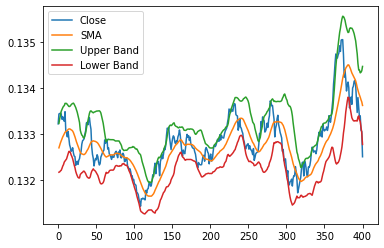

In [75]:
#Make sure it works
less_data = data.iloc[20:420]
X = np.linspace(0, 400, num=400)

close = less_data["Close_VET"]
sma = less_data["SMA"]
Upper_band = less_data["Upper_Bollinger_Band"]
Lower_band = less_data["Lower_Bollinger_Band"]

close_line, = plt.plot(X, close)
close_line.set_label('Close')

sma_line, = plt.plot(X, sma)
sma_line.set_label('SMA')

upper_line, = plt.plot(X, Upper_band)
upper_line.set_label('Upper Band')

lower_line, = plt.plot(X, Lower_band)
lower_line.set_label('Lower Band')


plt.legend()


In [76]:
data.to_csv("VET-BTC-Data-1Week-W-SMA-Bands.txt")
data.to_csv("VET-BTC-Data-1Week-W-SMA-Bands.csv")